In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

#numpy stats

import scipy.stats as sts



%matplotlib inline

In [115]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)


In [116]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [117]:
ride_df.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12


In [118]:
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [119]:
ride_df.count()


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [120]:
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [121]:
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [122]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [123]:
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [124]:
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [125]:
sum(city_df["type"]=="Urban")

66

In [126]:
sum(city_df["type"]=="Rural")

18

In [127]:
sum(city_df["type"]=="Suburban")

36

In [128]:
pyber_df=pd.merge(ride_df, city_df,how="left", on=["city", "city"] )

In [129]:
pyber_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,2019-01-30 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2019-02-10 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,2019-05-07 19:22,44.94,4.256850e+12,4,Rural


In [130]:
#create 3 data frames, one for each type of city
urban_df = pyber_df[pyber_df["type"]=="Urban"]
rural_df = pyber_df[pyber_df["type"]=="Rural"]
suburban_df = pyber_df[pyber_df["type"]=="Suburban"]

In [131]:
#get the ride count for each city 
urban_ride_count = urban_df.groupby(["city"]).count()["fare"]
suburban_ride_count = suburban_df.groupby(["city"]).count()["fare"]
rural_ride_count = rural_df.groupby(["city"]).count()["fare"]

In [132]:
#get the average fare for city
urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]

In [133]:
#get the number of drivers for each city

urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]

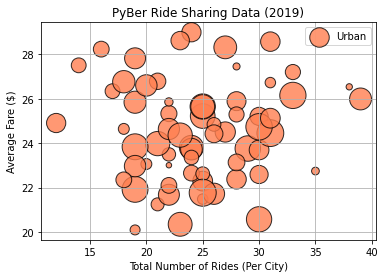

In [134]:
#urban plot

plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color = "coral", 
            alpha = 0.8, label = "Urban", linewidths=1, edgecolor="black")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.legend()
plt.grid()
plt.show()


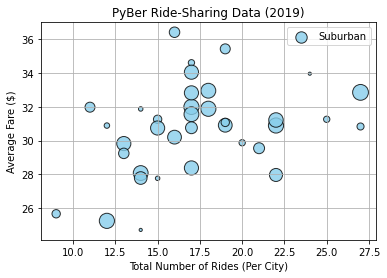

In [135]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

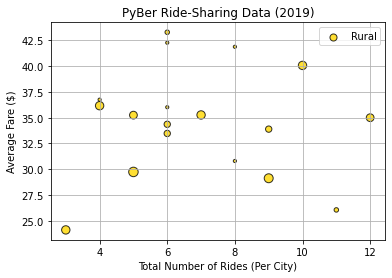

In [136]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

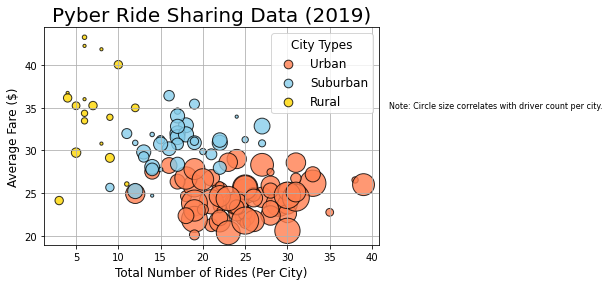

In [137]:
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color = "coral", 
            alpha = 0.8, label = "Urban", linewidths=1, edgecolor="black")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,alpha=0.8, label="Rural")

plt.title("Pyber Ride Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="8")
plt.savefig("analysis/Fig1.png")

In [138]:
urban_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [139]:
rural_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [140]:
suburban_df.describe()


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [141]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: fare, dtype: float64

In [142]:
rural_ride_count.describe()


count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: fare, dtype: float64

In [143]:
suburban_ride_count.describe()


count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: fare, dtype: float64

In [144]:
round(urban_ride_count.mean(),1), round(suburban_ride_count.mean(),1), round(rural_ride_count.mean(),1)

(24.6, 17.4, 6.9)

In [145]:
urban_ride_count.median()

24.0

In [146]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [147]:
suburban_ride_count.mode()

0    17
dtype: int64

In [156]:
#numpy stats

mean_urban_ride_count = np.mean(urban_ride_count)
print(f'Urban ride count mean is: {mean_urban_ride_count:.2f}.')


median_suburban_ride_count = np.median(suburban_ride_count)
print(f'Suburban ride count median is: {median_suburban_ride_count:.2f}.')


Urban ride count mean is: 24.62.
Suburban ride count median is: 17.00.


In [160]:
urban_fares = urban_df["fare"]

In [169]:
mean_urban_fares = np.mean(urban_fares)
print(f'Mean urban fares is: {mean_urban_fares:.2f}.')

median_urban_fares = np.median(urban_fares)
print(f'Median urban fares is: {median_urban_fares:.2f}.')

mode_urban_fares = sts.mode(urban_fares)
print(f"Mode urban fare is: {mode_urban_fares}.")

Mean urban fares is: 24.53.
Median urban fares is: 24.64.
Mode urban fare is: ModeResult(mode=array([22.86]), count=array([5])).


In [182]:
urban_drivers=urban_df["driver_count"]
rural_drivers=rural_df["driver_count"]
suburban_drivers=suburban_df["driver_count"]

In [185]:
#urban driver count 

urban_driver_mean= np.mean(urban_drivers)
print(f'Urban driver mean is: {urban_driver_mean:.2f}.')
urban_driver_median = np.median(urban_drivers)
print(f'Urban driver median is: {urban_driver_median:.2f}.')
urban_driver_mode = sts.mode(urban_drivers)
print(f'Urban Driver Mode is: {urban_driver_mode}.')

#suburban driver count 
suburban_driver_mean= np.mean(suburban_drivers)
print(f'Suburban driver mean is: {suburban_driver_mean:.2f}.')
suburban_driver_median = np.median(suburban_drivers)
print(f'Suburban driver median is: {suburban_driver_median:.2f}.')
suburban_driver_mode = sts.mode(suburban_drivers)
print(f'Suburban Driver Mode is: {suburban_driver_mode}.')

#rural driver count 
rural_driver_mean= np.mean(rural_drivers)
print(f'Rural driver mean is: {rural_driver_mean:.2f}.')
rural_driver_median = np.median(rural_drivers)
print(f'Rural driver median is: {rural_driver_median:.2f}.')
rural_driver_mode = sts.mode(rural_drivers)
print(f'Rural Driver Mode is: {rural_driver_mode}.')

Urban driver mean is: 36.68.
Urban driver median is: 37.00.
Urban Driver Mode is: ModeResult(mode=array([39], dtype=int64), count=array([86])).
Suburban driver mean is: 13.71.
Suburban driver median is: 16.00.
Suburban Driver Mode is: ModeResult(mode=array([20], dtype=int64), count=array([79])).
Rural driver mean is: 4.30.
Rural driver median is: 4.00.
Rural Driver Mode is: ModeResult(mode=array([1], dtype=int64), count=array([32])).
